## <font color=green>1.1 Dataset do projeto</font>
***

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

### Importando pandas e lendo o dataset do projeto

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('data/dados.csv')

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


---
---

### Importando bibliotecas

In [4]:
from scipy.special import comb

## <font color='blue'>Exemplo: Mega Sena</font>

Em um volante de loteria da Mega Sena temos um total de **60 números** para escolher onde a aposta mínima é de **seis números**. Você que é curiosa(o) resolve calcular a probabilidade de se acertar na Mega Sena com apenas **um jogo**. Para isso precisamos saber quantas **combinações de seis números podem ser formadas com os 60 números disponíveis**.


In [5]:
combinacoes = comb(60, 6)
combinacoes

50063860.0

In [6]:
probabilidade = 1 / combinacoes
print('%0.15f' % probabilidade)

0.000000019974489


## <font color='blue'>Exemplo: Concurso para cientista de dados</font>

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

### Qual o número de ensaios ($n$)?

In [7]:
n = 10
n

10

### Os ensaios são independentes?

Sim. A opção escolhida em uma questão não influencia em nada a opção escolhida em outra questão.

### Somente dois resultados são possíveis em cada ensaio?

Sim. O candidato tem duas possibilidades, ACERTA ou ERRAR uma questão. 

### Qual a probabilidade de sucesso ($p$)?

In [8]:
numero_de_alternativas_por_questao = 3
p = 1 / numero_de_alternativas_por_questao
p

0.3333333333333333

### Qual a probabilidade de fracasso ($q$)?

In [9]:
q = 1 - p
q

0.6666666666666667

### Qual o total de eventos que se deseja obter sucesso ($k$)?

In [10]:
k = 5
k

5

### Solução 1

In [11]:
probabilidade = (comb(n, k)) * (p ** k) * (q ** (n - k))
print('%0.8f' % probabilidade)

0.13656455


### Importando bibliotecas

In [12]:
from scipy.stats import binom

### Solução 2

In [13]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.13656455


### Obter a probabilidade do candidato passar

In [14]:
binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)

0.21312808006909492

In [15]:
binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()

0.21312808006909492

In [16]:
1 - binom.cdf(4, n, p)

0.21312808006909523

In [17]:
binom.sf(4, n, p)

0.21312808006909525

## <font color='blue'>Exemplo: Gincana</font>

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?

### Solução

In [18]:
p = 0.6
p

0.6

In [19]:
n = 12
n

12

In [20]:
k = 8
k

8

In [21]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.21284094


In [22]:
equipes = 30 * probabilidade
equipes

6.3852281856

## <font color=red>Problema</font>
***

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

## Distribuição Poisson

### Importando bibliotecas

In [23]:
import numpy as np

In [24]:
np.e

2.718281828459045

## <font color='blue'>Exemplo: Delivery</font>

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

### Qual o número médio de ocorrências por hora ($\mu$)?

In [25]:
media = 20
media

20

### Qual o número de ocorrências que queremos obter no período ($k$)?

In [26]:
k = 15
k

15

### Solução 1

In [27]:
probabilidade = ((np.e ** (-media)) * (media ** k)) / (np.math.factorial(k))
print('%0.8f' % probabilidade)

0.05164885


### Importando bibliotecas

### Solução 2

In [28]:
from scipy.stats import poisson

probabilidade = poisson.pmf(k, media)
print('%0.8f' % probabilidade)

0.05164885


## <font color=red>Problema</font>
***

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

## <font color=green>2.3 Distribuição Normal</font>
***

### Construindo tabela normal padronizada

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


### Obter a variável padronizada $Z$

In [30]:
media = 1.7
media

1.7

In [31]:
desvio_padrao = 0.1
desvio_padrao

0.1

In [32]:
Z = (1.8 - media) / desvio_padrao
Z

1.0000000000000009

### Solução 1 - Utilizando tabela

In [33]:
probabilidade = 0.8413
probabilidade

0.8413

### Solução 2 - Utilizando Scipy

In [34]:
from scipy.stats import norm
norm.cdf(Z)

0.8413447460685431

### Problema B - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img005.png' width='350px'>

### Obter a variável padronizada $Z$

In [35]:
Z_inferior = (1.6 - media) / desvio_padrao
round(Z_inferior, 2)

-1.0

In [36]:
Z_superior = (1.8 - media) / desvio_padrao
round(Z_superior, 2)

1.0

### Solução 1 - Utilizando tabela

In [37]:
probabilidade = (0.8413 - 0.5) * 2
probabilidade

0.6826000000000001

In [38]:
probabilidade = 0.8413 - (1 - 0.8413)
probabilidade

0.6826000000000001

### Solução 2 - Utilizando Scipy

In [39]:
probabilidade = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
probabilidade

0.6826894921370863

In [40]:
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

0.6826894921370857

### Obter a variável padronizada $Z$

In [41]:
Z = (1.9 - media) / desvio_padrao
Z

1.9999999999999996

### Solução 1 - Utilizando tabela

In [42]:
probabilidade = 1 - 0.9772
probabilidade

0.022800000000000042

### Solução 2 - Utilizando Scipy

In [43]:
probabilidade = 1 - norm.cdf(Z)
probabilidade

0.02275013194817921

In [44]:
probabilidade = norm.cdf(-Z)
probabilidade

0.022750131948179216

# AMOSTRAGEM

## População e Amostra

In [45]:
dados.shape[0]

76840

In [46]:
dados.Renda.mean()

2000.3831988547631

In [47]:
amostra = dados.sample(n = 1000, random_state = 101)

In [48]:
amostra.shape[0]

1000

In [49]:
amostra.Renda.mean()

1998.783

In [50]:
dados.Sexo.value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [51]:
amostra.Sexo.value_counts(normalize = True)

0    0.706
1    0.294
Name: Sexo, dtype: float64

## <font color='red'>Problema </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

## Teorema do limite central

In [52]:
n = 2000
total_de_amostras = 1500

In [53]:
amostras = pd.DataFrame()
amostras

""


In [94]:
for i in range(total_de_amostras):
    _ = dados.Idade.sample(n)
    _.index = range(0, len(_))
    amostras['Amostra_' + str(i)] = _

amostras

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,40,63,41,49,22,53,59,38,54,33,...,42,33,62,36,37,66,29,27,49,25
1,79,59,18,41,33,53,24,48,53,49,...,65,42,52,54,35,60,47,62,51,55
2,52,48,43,42,39,58,53,38,47,65,...,58,32,27,55,41,32,32,42,27,43
3,49,28,41,47,39,41,32,40,40,50,...,25,49,46,38,28,37,49,60,22,67
4,35,27,51,61,44,47,32,37,37,46,...,37,56,33,46,49,28,33,54,53,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,43,30,57,51,38,53,58,33,34,54,...,71,25,34,49,33,56,55,41,40,42
1996,50,51,59,51,37,41,50,58,49,47,...,42,30,34,65,47,42,35,68,55,80
1997,28,54,55,27,49,49,47,33,53,21,...,64,48,77,37,42,25,58,42,37,39
1998,31,52,40,55,42,42,45,34,30,54,...,24,66,28,54,29,56,55,20,43,48


In [55]:
amostras.mean()

Amostra_0       44.2770
Amostra_1       44.0485
Amostra_2       44.1890
Amostra_3       44.2035
Amostra_4       43.6520
                 ...   
Amostra_1495    44.0620
Amostra_1496    43.4155
Amostra_1497    44.2455
Amostra_1498    44.0785
Amostra_1499    44.4545
Length: 1500, dtype: float64

<AxesSubplot:>

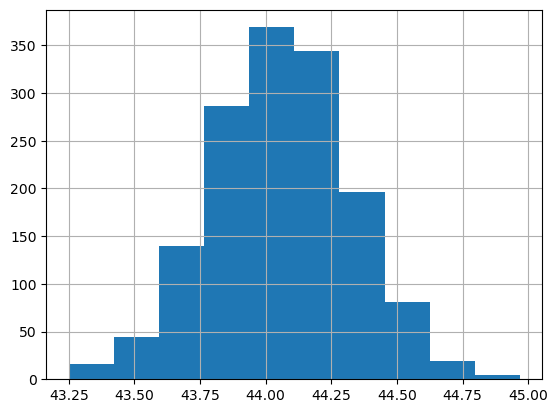

In [56]:
amostras.mean().hist()

In [57]:
dados.Idade.mean()

44.07142113482561

In [58]:
amostras.mean().mean()

44.0589446666667

In [59]:
amostras.mean().std()

0.2666956817473129

In [60]:
dados.Idade.std()

12.480583465360187

In [61]:
dados.Idade.std() / np.sqrt(n)

0.2790743302740527

## Níveis de confiança e significância

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

## <font color='blue'>Exemplo: </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.

### Média amostral

In [62]:
media_amostra = 5050
media_amostra

5050

### Nível de significância ($\alpha$)

In [63]:
significancia = 0.05
significancia

0.05

### Nível de confiança ($1 - \alpha$)

In [64]:
confianca = 1 - significancia
confianca

0.95

### Obtendo $z$

In [65]:
tabela_normal_padronizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


### Obtendo $z$

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

In [66]:
0.95 / 2

0.475

In [67]:
0.5 + (0.95 / 2)

0.975

In [68]:
1.9 + 0.06

1.96

In [69]:
z = norm.ppf(0.975)
z

1.959963984540054

### Obtendo $\sigma_\bar{x}$

In [70]:
desvio_padrao = 150
desvio_padrao

150

In [71]:
n = 20
n

20

In [72]:
raiz_de_n = np.sqrt(n)
raiz_de_n

4.47213595499958

In [73]:
sigma = desvio_padrao / raiz_de_n
sigma

33.54101966249684

### Obtendo $e$

In [74]:
e = z * sigma
e

65.73919054324361

### Solução 1 - Calculando o intervalo de confiança para a média

In [75]:
intervalo = (
  media_amostra - e,
  media_amostra + e  
)
intervalo

(4984.260809456757, 5115.739190543243)

### Solução 2 - Calculando o intervalo de confiança para a média

In [76]:
norm.interval(alpha = 0.95, loc = media_amostra, scale = sigma)

C:\Users\Micaeld\AppData\Local\Temp\ipykernel_16228\3129037810.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  norm.interval(alpha = 0.95, loc = media_amostra, scale = sigma)


(4984.260809456757, 5115.739190543243)

# CÁLCULO DO TAMANHO DA AMOSTRA

## <font color='red'>Problema </font>

Estamos estudando o rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

## Variáveis quantitativas e população infinita

## <font color='blue'>Exemplo: Rendimento médio</font>

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

In [77]:
0.95 / 2

0.475

In [78]:
0.5 + (0.95 / 2)

0.975

In [79]:
z = norm.ppf(0.975)
z

1.959963984540054

### Obtendo $\sigma$

In [80]:
sigma = 3323.39
sigma

3323.39

### Obtendo $e$

In [81]:
e = 100
e

100

### Obtendo $n$

In [82]:
n = (z * (sigma / e)) ** 2
int(n.round())

4243

## <font color='red'>Problema</font>

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

## <font color='blue'>Exemplo: Indústria de refrigerantes</font>

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

### Obtendo $N$

In [83]:
N = 10000
N

10000

### Obtendo $z$

In [84]:
z = norm.ppf((0.5 + (0.95 / 2)))
z

1.959963984540054

### Obtendo $s$

In [85]:
s = 12
s

12

### Obtendo $e$

In [86]:
e = 5
e

5

### Obtendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [87]:
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())

22

## <font color='blue'>Exemplo: Rendimento médio</font>

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

### Construindo o dataset conforme especificado pelo problema

In [88]:
renda_5000 = dados.query('Renda <= 5000').Renda

In [89]:
sigma = renda_5000.std()
sigma

1082.794549030635

In [90]:
media = renda_5000.mean()
media

1426.5372144947232

### Calculando o tamanho da amostra

In [91]:
z = norm.ppf(.975)
e = 10
n = (z * (sigma / e)) ** 2
n = int(n.round())
n

45039

### Calculando o intervalo de confiança para a média

In [92]:
intervalo = norm.interval(alpha = 0.95, loc = media, scale = sigma / np.sqrt(n))
intervalo

C:\Users\Micaeld\AppData\Local\Temp\ipykernel_16228\1746044911.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  intervalo = norm.interval(alpha = 0.95, loc = media, scale = sigma / np.sqrt(n))


(1416.5372195108241, 1436.5372094786223)

### Realizando uma prova gráfica

<AxesSubplot:>

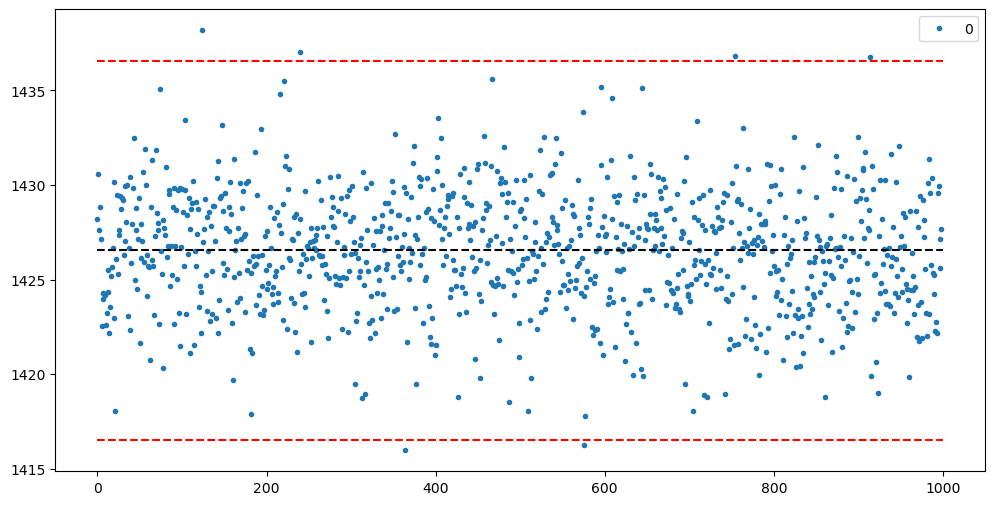

In [93]:
import matplotlib.pyplot as plt

tamanho_simulacao = 1000

medias = [renda_5000.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax

In [ ]:
_